## Load Dataset

In [108]:
import pandas as pd

# load dataset
df = pd.read_csv('ikn_sentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                150 non-null    object
 1   postTitle         150 non-null    object
 2   facebookUrl       150 non-null    object
 3   profileId         150 non-null    object
 4   profileName       150 non-null    object
 5   date              150 non-null    object
 6   text              150 non-null    object
 7   sentiment         150 non-null    object
 8   manual_sentiment  150 non-null    object
dtypes: object(9)
memory usage: 10.7+ KB


In [109]:
df.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,sentiment,manual_sentiment
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3Mzc3OTE1MT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02fwJKgDhZiBpMrvpg3djD874VZ445ttnNNW9WhuM...,Ardiwae Ardiwae,2023-05-31T10:02:43.000Z,Heyyy jika memang presiden ini bodoh jangan la...,negative,negative
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",positive,positive
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,positive,neutral
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",positive,positive
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzI1MzA1MTMzNz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid04tTqcyxpUPejJxEi5nSKFAn8gtmewdnsP156TFZP...,Subhan Djunaid,2023-05-30T12:55:40.000Z,"Tidak ada urgensinya membangun IKN, sama denga...",positive,negative


<Axes: >

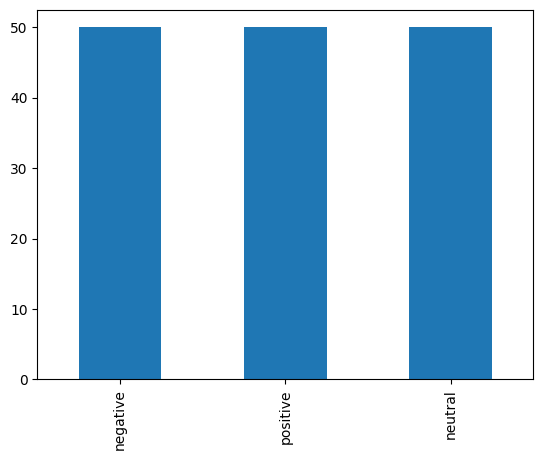

In [110]:
# visualize manual sentiment distribution with different colors
df['manual_sentiment'].value_counts().plot(kind='bar')


## Preprocess Data

In [111]:
# import library
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [112]:
# preprocess indonesian text data
def preprocess_text(text):
    # remove url
    text = re.sub(r"http\S+", "", text)
    # remove angka
    text = re.sub(r"\d+", " ", text)
    # remove punctuation
    text = text.translate(str.maketrans(" "," ",string.punctuation))
    # remove whitespace leading & trailing
    text = text.strip()
    # remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    # case folding
    text = text.lower()
    # tokenization
    text = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    text = [word for word in text if not word in stop_words]
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    # join text
    text = ' '.join(text)
    return text

In [113]:
# apply preprocess_text function
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,id,postTitle,facebookUrl,profileId,profileName,date,text,sentiment,manual_sentiment,clean_text
0,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3Mzc3OTE1MT...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02fwJKgDhZiBpMrvpg3djD874VZ445ttnNNW9WhuM...,Ardiwae Ardiwae,2023-05-31T10:02:43.000Z,Heyyy jika memang presiden ini bodoh jangan la...,negative,negative,heyyy presiden bodoh pilih nya susah amburadul
1,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1Xzc3NDM5NDk4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0saKxptybZ9b2T5xgjcFjVZ9aERroTYYkeczmq6Sf...,Mas Ongen,2023-05-30T12:38:17.000Z,"Logo yg sgt bagus, sebab bermakna dari pohon a...",positive,positive,logo yg sgt bagus makna pohon tumbuh yg hidup ...
2,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzE2Mzc2NzQ4MD...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid0dbYxtHpmLoTj6ieMa9JSrKoAw4oKDqUFHzKUNKw6...,Aditya Ilhami Anwar,2023-06-03T08:49:10.000Z,Ya bagus seni mendapatkan apresiasi lebih. Tet...,positive,neutral,ya bagus seni apresiasi aplikasi nya paksa ban...
3,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzEzMDg4NzI4ND...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid02hVj2e2cxQEEp8UsnQKsxHk8fb8TD15fZF5ZFcGn...,Wahyu Soetisna,2023-05-31T01:43:45.000Z,"Keren sih ini, logonya minimalis tpi bermakna....",positive,positive,keren sih logo minimal tpi makna moga daerah j...
4,Y29tbWVudDo2MjQ2NDkyNzAyMTMxMzc1XzI1MzA1MTMzNz...,Presiden Jokowi akhirnya mengumumkan logo IKN ...,https://www.facebook.com/jawaposonline/photos/...,pfbid04tTqcyxpUPejJxEi5nSKFAn8gtmewdnsP156TFZP...,Subhan Djunaid,2023-05-30T12:55:40.000Z,"Tidak ada urgensinya membangun IKN, sama denga...",positive,negative,urgensi bangun ikn kereta api cepat cuman gaya...


## Sentiment SVM

In [114]:
# import library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

Split Dataset

In [115]:
# split dataset
X = df['clean_text']
y = df['manual_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create tfidf vectorizer
tfidf = TfidfVectorizer()

# fit and transform
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

# create SVM model
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 120
The shape of X_test is: 30


SVM

In [116]:
# create model
model = SVC()

# train model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

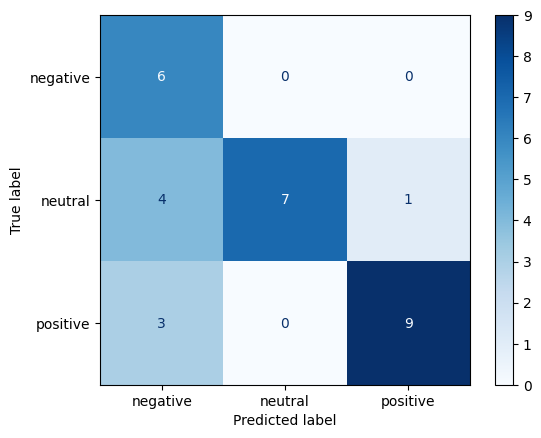

In [117]:
# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [118]:
# calculate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.46      1.00      0.63         6
     neutral       1.00      0.58      0.74        12
    positive       0.90      0.75      0.82        12

    accuracy                           0.73        30
   macro avg       0.79      0.78      0.73        30
weighted avg       0.85      0.73      0.75        30



In [119]:
# import library
from sklearn.metrics import accuracy_score

# calculate accuracy
print(accuracy_score(y_test, y_pred))

0.7333333333333333


In [120]:
# install wordcloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


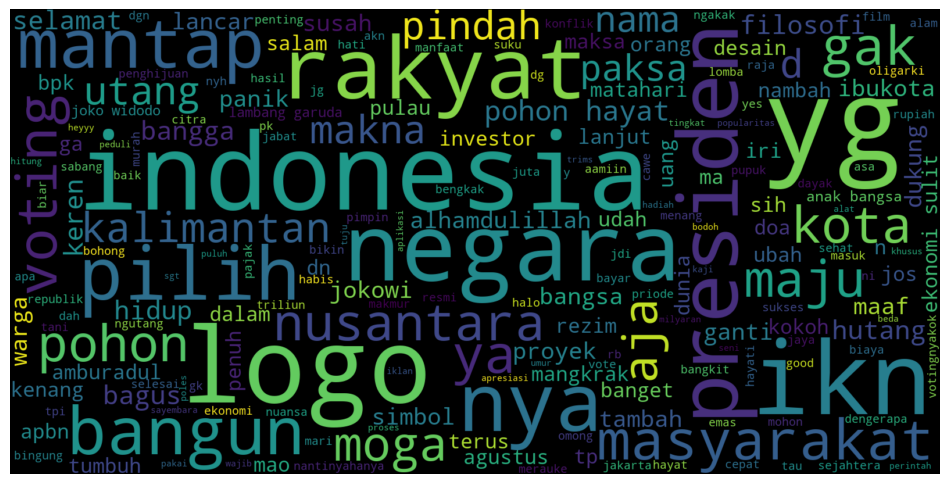

In [121]:
# make word cloud
from wordcloud import WordCloud

# create wordcloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df['clean_text']))

# plot wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

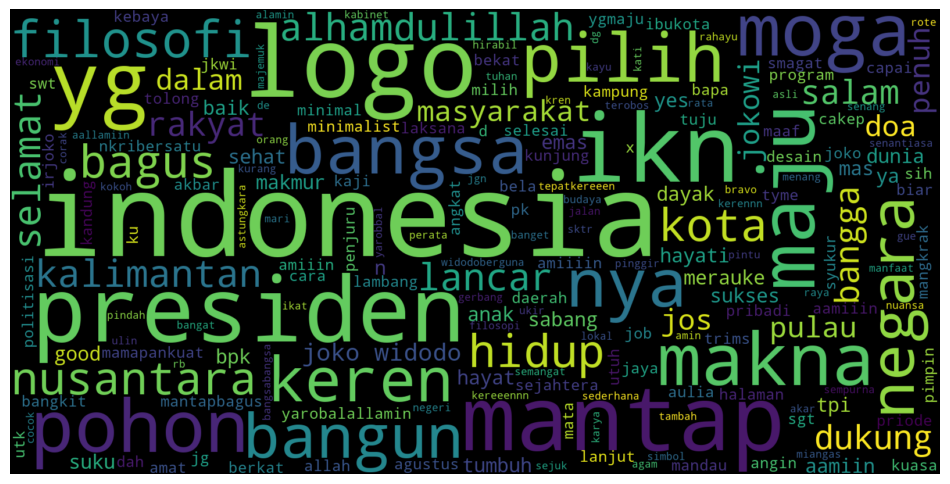

In [122]:
# wordcloud for positive sentiment
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df[df['manual_sentiment']=='positive']['clean_text']))

# plot wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

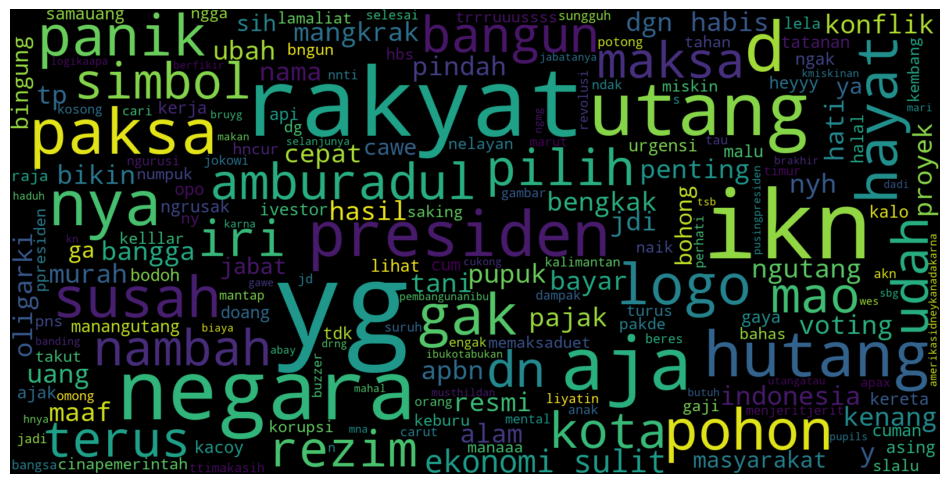

In [127]:
# wordcloud for negative sentiment
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df[df['manual_sentiment']=='negative']['clean_text']))

# plot wordcloud with caption negative sentiment
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

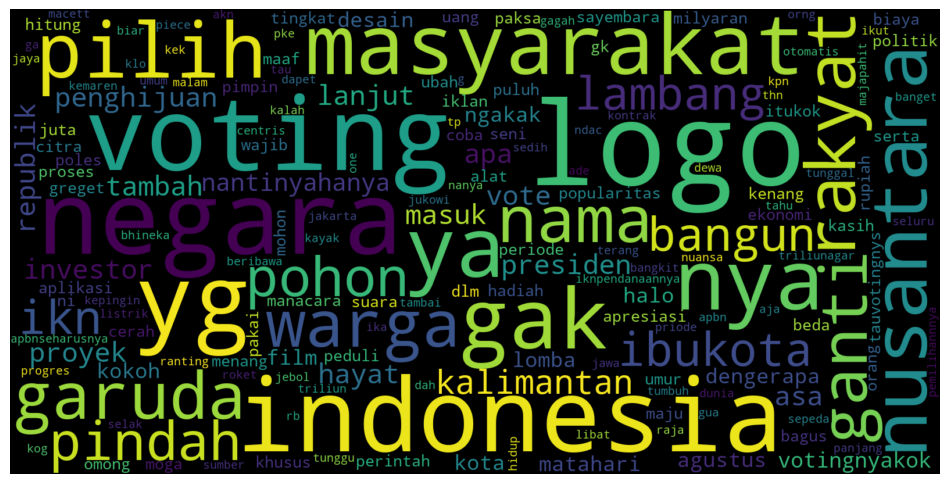

In [124]:
# wordcloud for neutral sentiment
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df[df['manual_sentiment']=='neutral']['clean_text']))

# plot wordcloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()